## Tugas Akhir Microcredential Associate Data Scientist

### ITS-05 kelompok 3

#### Preface

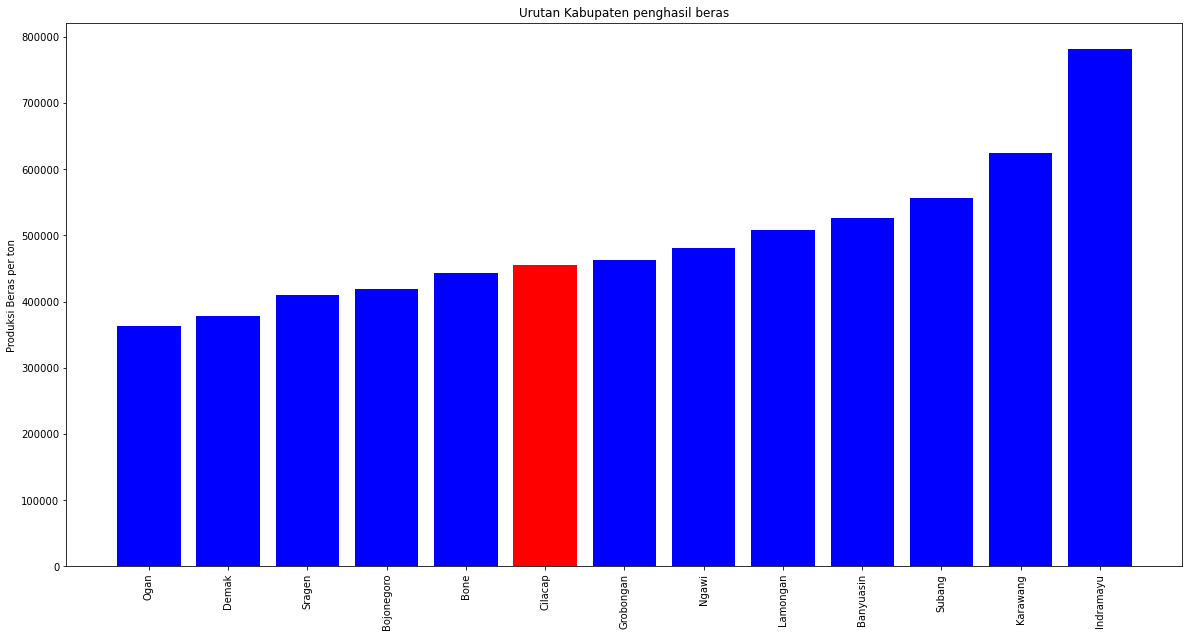

### Import Necessary Library and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from read_all_data import read_data

import seaborn as sns
import missingno as mno
from sklearn import linear_model

In [2]:
# import 3 periode of season
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

ignore_data = ["8888"] # temporary, kalau ada ide buat ngolah nilai "8888", command ini bisa dihilangkan

df = pd.read_excel('dataset_iklim_cilacap_before_cleaning.xlsx', na_values = ignore_data)

In [3]:
# Quick data check

print(f"DataFrame shape : {df.shape}\n")
print(f"DataFrame columns: \n{df.columns}\n")
print(f"Columns type: {df.dtypes}")

df.head(3)

DataFrame shape : (547, 11)

DataFrame columns: 
Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

Columns type: Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ddd_x      float64
ff_avg     float64
ddd_car     object
dtype: object


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-10-2018,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E
1,02-10-2018,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N
2,03-10-2018,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E


In [4]:
# Quick data prep


from datetime import datetime
df['datetime'] = [datetime.strptime(x,'%d-%m-%Y') for x in df['Tanggal']] # change string 'Tanngal' to timeseries format

# change datetime as index; renaming columns

df = df.set_index('datetime')
df.drop('Tanggal', axis=1, inplace=True)
df.rename(columns={"RR": "curah_hujan", "Tavg": "temp_avg", "RH_avg": "humid_avg", "ss": "sun_expo", "ff_x": "wind_max", "ff_avg": "wind_avg", "Tn": "temp_min", "Tx": "temp_max"}, inplace=True)

# Menambahkan kolom 'Year', 'Month', 'Weekday' untuk mempermudah visualisasi
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

In [5]:
# Dividing 1 dataset to 3 periode (just for easier visualization & statistical description)
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

df_periode1 = df.loc['2018-10-01':'2019-03-01']
df_periode2 = df.loc['2019-10-01':'2020-03-01']
df_periode3 = df.loc['2020-10-01':'2021-03-01']

In [ ]:
df_periode1

### Exploratory Data Analysis

In [ ]:
#### Curah Hujan

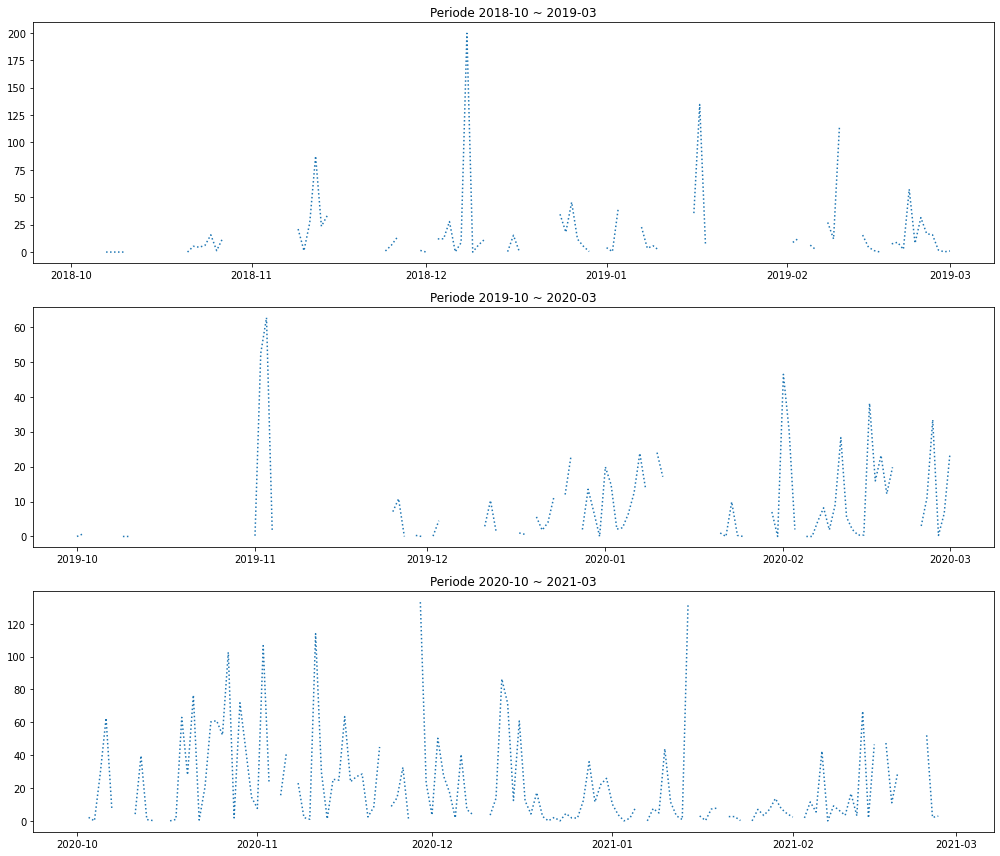

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,12))

axes[0].plot(df_periode1['curah_hujan'], linestyle=':')
axes[0].set_title('Periode 2018-10 ~ 2019-03')

axes[1].plot(df_periode2['curah_hujan'], linestyle=':')
axes[1].set_title('Periode 2019-10 ~ 2020-03')

axes[2].plot(df_periode3['curah_hujan'], linestyle=':')
axes[2].set_title('Periode 2020-10 ~ 2021-03')

plt.tight_layout()

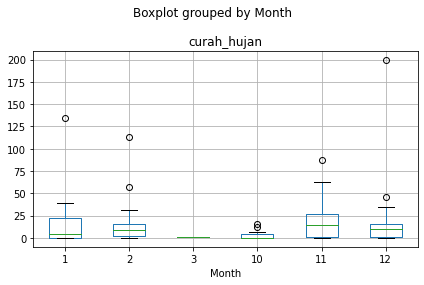

In [13]:
df_periode1.boxplot(column=['curah_hujan'], by='Month')

plt.tight_layout()

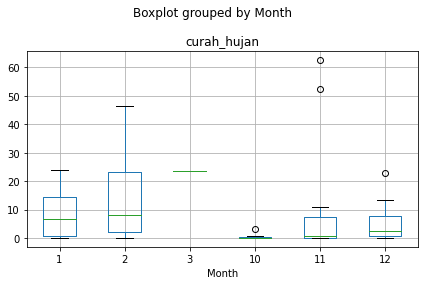

In [14]:
df_periode2.boxplot(column=['curah_hujan'], by='Month')

plt.tight_layout()

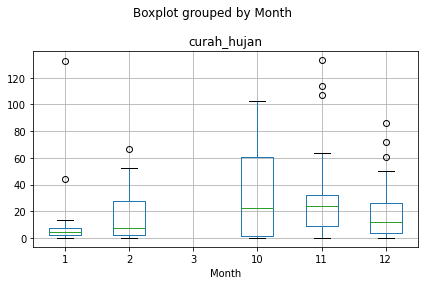

In [15]:
df_periode3.boxplot(column=['curah_hujan'], by='Month')

plt.tight_layout()

### Data Preparation (data cleaning)